In [3]:
from ephys import viz, core, clust, events, spiketrains
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neuraltda.topology2 as tp2
import glob
import os
from importlib import reload
%matplotlib inline

/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [1]:
bp = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
bp = '/home/brad/emily/P01S18/'
bp = '/home/brad/krista/B1075/P01S03/'
bp = '/home/brad/krista/B1083/P03S03/'
bp = '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'

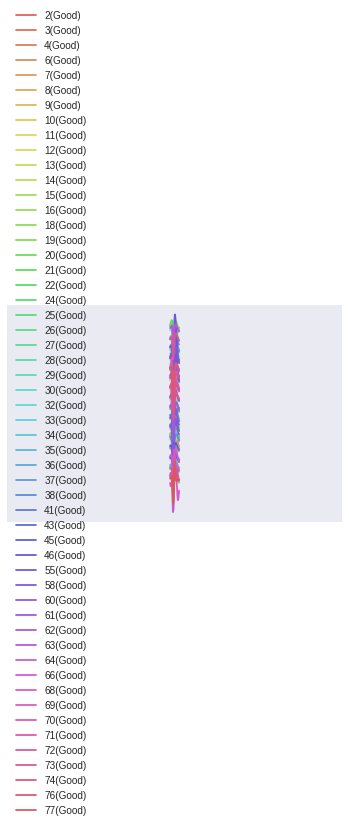

In [4]:
viz.plot_all_clusters(bp, )

/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:224: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


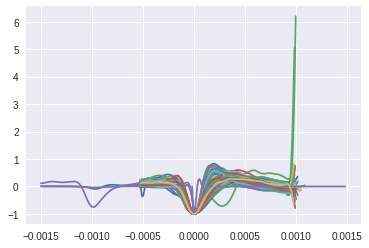

In [22]:
reload(viz)
clusters = core.load_clusters(bp)
fs = core.load_fs(bp)
cluster_group = ['Good', 'MUA']
cluster_group = ['Good']
clulist = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()
plt.figure()
for clu in clulist:
    viz.plot_spike_shape(bp, clu)

/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:224: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


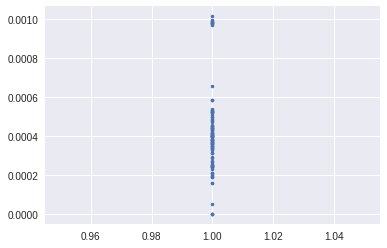

In [23]:
spwidths = []
for clu in clulist:
    spwidths.append(clust.get_width(bp, clu))
    
plt.plot(len(spwidths)*[1], spwidths, '.')
#plt.plot([0.94, 1.06], 2*[0.000230], '--')

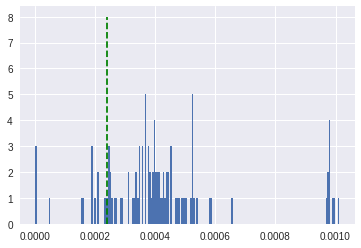

In [24]:
t = 0.000240
a = plt.hist(spwidths, bins=200)
plt.plot([t, t], [0, 8], 'g--')
#plt.xlim([0.0001, 0.0005])

In [10]:
clulist = clusters['cluster'].unique()
wide = []
narrow = []
thresh = 0.000540
for clu in clulist:
    sw = clust.get_width(bp, clu)
    if sw >= thresh:
        wide.append(clu)
    else:
        narrow.append(clu)


In [19]:
cluster_group = ['Good', 'MUA']
cluster_group = ['Good']
c2 = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()

In [21]:
len(c2)


101

# Test for Auditory Response

In [5]:
#bp = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#blockPath = bp
spikes = core.load_spikes(bp)
clusters = core.load_clusters(bp)
fs = core.load_fs(bp)
trials = events.load_trials(bp)

In [6]:
trials

,recording,time_samples,stimulus,stimulus_end,response,response_time,consequence,correct,datetime,correction
0,0,125068,D_scaled_burung,331790,NaN,NaN,NaN,NaN,2015-12-31 22:08:31.294487,False
1,0,440996,D_scaled_burung,647718,NaN,NaN,NaN,NaN,2015-12-31 22:08:41.404183,False
2,0,780458,D_scaled_burung,987180,NaN,NaN,NaN,NaN,2015-12-31 22:08:52.266967,False
3,0,1109634,H_scaled_burung,1316357,NaN,NaN,NaN,NaN,2015-12-31 22:09:02.800599,False
4,0,1399201,L_scaled_burung,1605920,NaN,NaN,NaN,NaN,2015-12-31 22:09:12.066743,False
5,0,1706575,J_scaled_burung,1913294,NaN,NaN,NaN,NaN,2015-12-31 22:09:21.902711,False
6,0,2074471,F_scaled_burung,2281193,NaN,NaN,NaN,NaN,2015-12-31 22:09:33.675383,False
7,0,2374762,M_scaled_burung,2581481,NaN,NaN,NaN,NaN,2015-12-31 22:09:43.284695,False
8,0,2732127,I_scaled_burung,2938845,NaN,NaN,NaN,NaN,2015-12-31 22:09:54.720375,False
9,0,3065870,N_scaled_burung,3272589,NaN,NaN,NaN,NaN,2015-12-31 22:10:05.400151,False


In [87]:
import tqdm
good_mua_clusters = clusters[clusters['quality'].isin(['Good', 'MUA'])]
good_mua_clusters_list = good_mua_clusters['cluster'].values


trial_store = []

for cluster in good_mua_clusters_list:
    print(cluster)

    
    
    act_store = []
    for trial in tqdm.tqdm(trials.iterrows()):
        rec = trial[1]['recording']
        
        stim_start = trial[1]['time_samples']
        stim_end = trial[1]['stimulus_end']
        prestim_spiketrain = spiketrains.get_spiketrain(rec, stim_start, cluster, spikes, [-2, 0], fs)
        stim_spiketrain = spiketrains.get_spiketrain(rec, stim_start, cluster, spikes, [0, float(stim_end)/fs], fs)
        prestim_inds = np.nonzero(prestim_spiketrain)[0]
        prestim_isis = prestim_inds[1:] - prestim_inds[:-1]
        stim_inds = np.nonzero(stim_spiketrain)[0]
        stim_isis = stim_inds[1:] - stim_inds[:-1]
        prestim_mean = np.mean(prestim_isis)
        stim_mean = np.mean(stim_isis)
        activity = (stim_mean - prestim_mean) / prestim_mean
        act_store.append(activity)
    trial_store.append(act_store)
    
trial_store = np.array(trial_store)

0it [00:00, ?it/s]

2


516it [03:29,  3.23it/s]
0it [00:00, ?it/s]

5


516it [02:58,  3.31it/s]
0it [00:00, ?it/s]

6


/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
516it [02:48,  3.28it/s]
0it [00:00, ?it/s]

9


516it [02:46,  3.27it/s]
0it [00:00, ?it/s]

10


516it [02:47,  1.66it/s]
0it [00:00, ?it/s]

11


516it [02:47,  3.19it/s]
0it [00:00, ?it/s]

12


516it [02:39,  3.27it/s]
0it [00:00, ?it/s]

14


516it [02:43,  3.28it/s]
0it [00:00, ?it/s]

15


516it [02:44,  3.29it/s]
0it [00:00, ?it/s]

16


516it [02:43,  3.31it/s]
0it [00:00, ?it/s]

17


516it [02:37,  3.34it/s]
0it [00:00, ?it/s]

18


516it [02:40,  3.27it/s]
0it [00:00, ?it/s]

19


516it [02:42,  3.28it/s]
0it [00:00, ?it/s]

20


516it [02:42,  3.30it/s]
0it [00:00, ?it/s]

21


516it [02:44,  3.29it/s]
0it [00:00, ?it/s]

22


516it [02:43,  3.24it/s]
0it [00:00, ?it/s]

24


516it [02:39,  3.32it/s]
0it [00:00, ?it/s]

27


516it [02:38,  3.33it/s]
0it [00:00, ?it/s]

28


516it [02:42,  3.16it/s]
0it [00:00, ?it/s]

31


516it [02:44,  3.24it/s]
0it [00:00, ?it/s]

32


516it [02:46,  3.23it/s]
0it [00:00, ?it/s]

33


516it [02:43,  3.28it/s]
0it [00:00, ?it/s]

37


516it [02:41,  3.33it/s]
0it [00:00, ?it/s]

41


516it [02:40,  3.33it/s]
0it [00:00, ?it/s]

54


516it [02:47,  3.32it/s]
0it [00:00, ?it/s]

57


516it [02:42,  3.30it/s]
0it [00:00, ?it/s]

58


516it [02:46,  3.33it/s]
0it [00:00, ?it/s]

59


516it [02:56,  3.12it/s]
0it [00:00, ?it/s]

60


516it [03:44,  3.32it/s]
0it [00:00, ?it/s]

61


516it [03:56,  3.24it/s]
0it [00:00, ?it/s]

63


516it [04:08,  3.31it/s]
0it [00:00, ?it/s]

64


516it [04:01,  3.31it/s]
0it [00:00, ?it/s]

65


516it [04:12,  3.28it/s]
0it [00:00, ?it/s]

66


516it [04:30,  3.32it/s]
0it [00:00, ?it/s]

67


516it [04:17,  3.22it/s]
0it [00:00, ?it/s]

69


516it [04:16,  3.30it/s]
0it [00:00, ?it/s]

70


516it [04:23,  3.31it/s]
0it [00:00, ?it/s]

72


516it [04:27,  3.27it/s]
0it [00:00, ?it/s]

75


516it [04:34,  3.26it/s]
0it [00:00, ?it/s]

81


516it [04:50,  3.32it/s]
0it [00:00, ?it/s]

83


516it [04:45,  3.30it/s]
0it [00:00, ?it/s]

84


516it [04:50,  3.27it/s]
0it [00:00, ?it/s]

86


516it [04:56,  3.30it/s]
0it [00:00, ?it/s]

87


516it [05:15,  3.27it/s]
0it [00:00, ?it/s]

90


516it [05:29,  3.31it/s]
0it [00:00, ?it/s]

91


516it [04:58,  3.31it/s]
0it [00:00, ?it/s]

92


516it [05:05,  2.74it/s]
0it [00:00, ?it/s]

97


516it [05:22,  3.30it/s]
0it [00:00, ?it/s]

98


516it [04:09,  3.32it/s]
0it [00:00, ?it/s]

99


516it [02:35,  3.35it/s]
0it [00:00, ?it/s]

101


516it [03:10,  3.34it/s]
0it [00:00, ?it/s]

102


516it [02:58,  3.31it/s]
0it [00:00, ?it/s]

104


516it [02:46,  3.35it/s]
0it [00:00, ?it/s]

106


516it [02:39,  3.26it/s]
0it [00:00, ?it/s]

107


516it [02:50,  3.23it/s]
0it [00:00, ?it/s]

108


516it [03:06,  3.36it/s]
0it [00:00, ?it/s]

112


516it [03:07,  3.35it/s]
0it [00:00, ?it/s]

113


516it [03:03,  3.30it/s]
0it [00:00, ?it/s]

115


516it [03:04,  3.29it/s]
0it [00:00, ?it/s]

118


516it [02:47,  3.28it/s]
0it [00:00, ?it/s]

119


516it [02:57,  3.31it/s]
0it [00:00, ?it/s]

120


516it [03:12,  3.30it/s]
0it [00:00, ?it/s]

121


516it [03:21,  3.14it/s]
0it [00:00, ?it/s]

128


516it [03:09,  3.36it/s]
0it [00:00, ?it/s]

131


516it [03:11,  3.26it/s]
0it [00:00, ?it/s]

132


516it [03:00,  3.36it/s]
0it [00:00, ?it/s]

136


516it [03:20,  3.31it/s]
0it [00:00, ?it/s]

139


516it [03:19,  3.32it/s]
0it [00:00, ?it/s]

140


516it [03:37,  3.30it/s]
0it [00:00, ?it/s]

141


516it [03:46,  3.28it/s]
0it [00:00, ?it/s]

145


516it [03:33,  3.31it/s]
0it [00:00, ?it/s]

148


516it [03:07,  3.30it/s]
0it [00:00, ?it/s]

149


516it [03:22,  3.36it/s]
0it [00:00, ?it/s]

150


516it [03:38,  3.25it/s]


In [88]:
import pickle


In [90]:
with open('/home/brad/auditory.pkl', 'wb') as f:
    pickle.dump(trial_store, f)

In [94]:
trial_mean = np.nanmean(trial_store, axis=1)
trial_mean

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [17]:
window = [-2, 0]
samps = stim_start
bds = [w*fs+samps for w in window]
clu = cluster

window_mask = (
        (spikes['time_samples']>bds[0])
        & (spikes['time_samples']<=bds[1])
        )
    
perievent_spikes = spikes[window_mask]
    
mask = (
        (perievent_spikes['recording']==rec)
        & (perievent_spikes['cluster']==clu)
        )
t = (perievent_spikes['time_samples'][mask].values.astype(np.float_) - samps) / fs

ValueError: Lengths must match to compare

In [20]:
t1 = perievent_spikes['recording']==rec
t2 = (perievent_spikes['cluster']==clu)

ValueError: Lengths must match to compare

In [32]:
blockPath = '/home/brad/emily/P01S15/'
winSize = 10.0 #ms
thresh = 13.0
povers = 0.5
cluster_group = ['Good', 'MUA']
widenarrow_threshold = 0.000230 # sw threshold in seconds
stimsegmentInfo = [0, 0] # Sample/Distractor Period
prestimsegmentInfo = [-2000, 0]
spikes = core.load_spikes(blockPath)
trials = events.load_trials(blockPath)
fs = core.load_fs(blockPath)
povers = 0.0

# Get wide/narrow clusters
clusters = core.load_clusters(blockPath)
clusters_list = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()

# Bin and compute SCG
bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    stimsegmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='stimulus_period')
bdf_stim = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    prestimsegmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='prestimulus_period')
bdf_prestim = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]


Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


Data Not already binned


In [61]:
import h5py as h5

thresh = 1.0
stimdiffs = {}
stimabv = {}
with h5.File(bdf_stim) as stimfile:
    stims = stimfile.keys()
    with h5.File(bdf_prestim) as prestimfile:
        for stim in stimfile.keys():
            print(stim)
            stim_data = stimfile[stim]
            stim_acty = np.mean(stim_data['pop_tens'], axis=1)
            
            prestim_data = prestimfile[stim]
            prestim_acty = np.mean(prestim_data['pop_tens'], axis = 1)
            
            pdiff = np.divide(stim_acty - prestim_acty, prestim_acty)*100.0
            #pdiff = stim_acty - prestim_acty
            abvthresh = 1.0*(stim_acty > thresh*prestim_acty)
            stimdiffs[stim] = pdiff
            stimabv[stim] = abvthresh

T-1S-1D3
T-1S-1D40
T3S3D-1
T3S3D40
T3S8D-1
T3S8D40
T40S40D-1
T40S40D3
T40S70D-1
T40S70D3


/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


In [63]:
celldata = []

for stim in stims:
    avgactydiff = np.nanmean(stimdiffs[stim], axis=1)
    celldata.append(avgactydiff)
    avgactyabv = np.mean(stimabv[stim], axis=1)
    print(stim, avgactydiff)
    print(stim, avgactyabv)

(u'T-1S-1D3', array([  25.38921591,   20.22701872,   44.80737018,   28.04137738,
         13.52538053,   28.02847557,   76.27512563,   38.91959799,
         50.37688442,   55.6281407 ,   -7.76884422,   -9.13123309,
        -12.4840871 ,   26.03738389,   13.28752201,   23.64321608,
         14.75779663,   13.55648786,    9.32160804,   55.94639866,
         50.70575098,   27.59250799,   68.65501751,   36.45309883,
         71.57286432,   32.21496371,   47.11474037,   15.05688163,
         46.00278304,   11.0489375 ,   43.28427854,   25.34077697,
         16.55267987,  -21.3964051 ,   30.32663317,   14.02080917,
          9.17048873,  -68.46492076,    0.25125628,   34.34536318,
         20.30150754,    0.25125628,   -3.57920555,  -27.59631491,
         28.75982476,  100.50251256,    4.47674269,   35.82605398,
         15.35355872,   67.08542714,   37.62383345,   33.79757373,
        100.50251256,   29.51887367,   39.11444098,   19.20422235,
         34.07751461,   16.0058073 ,   33.636515

In [66]:
celldata = np.array(celldata)

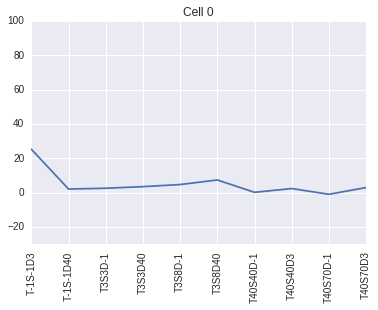

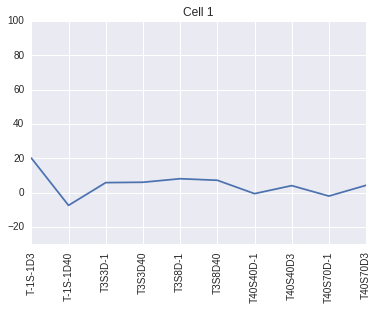

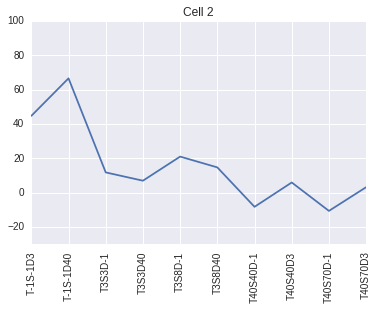

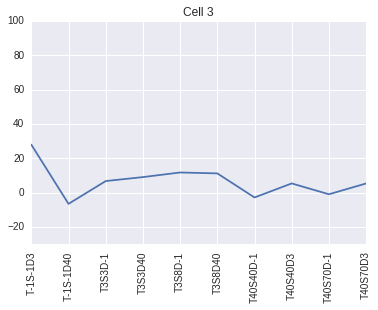

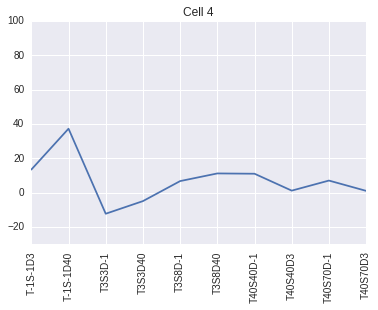

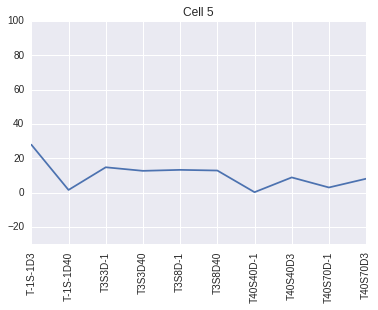

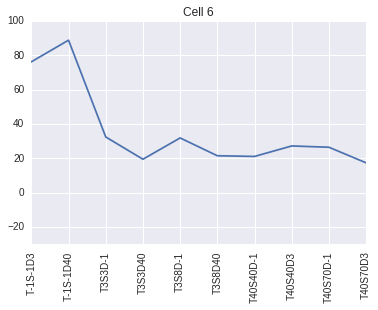

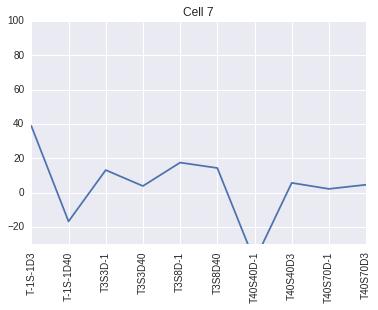

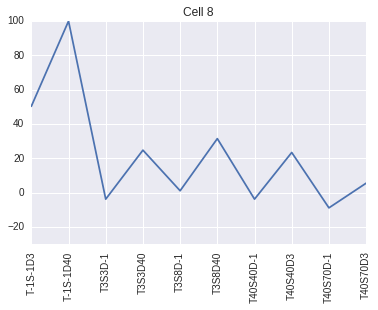

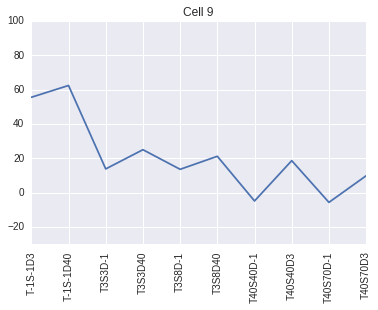

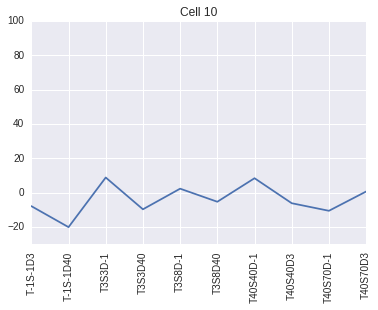

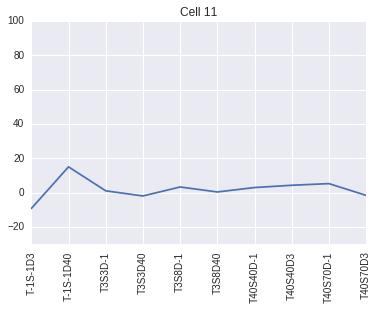

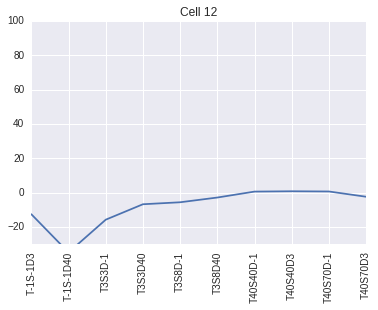

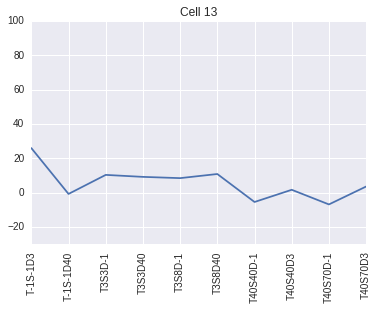

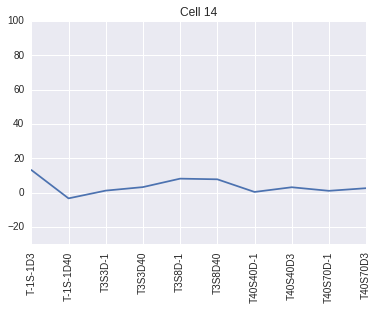

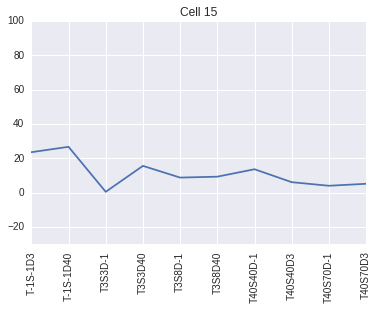

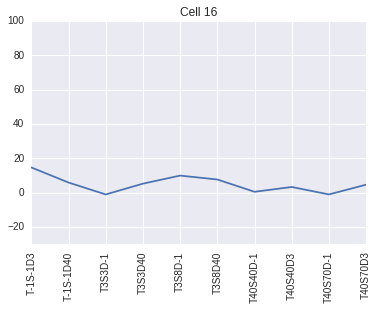

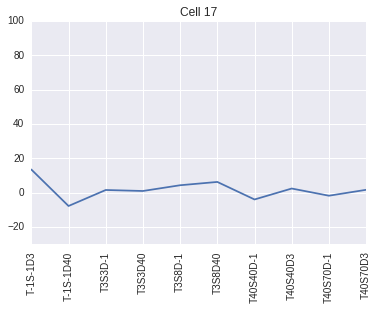

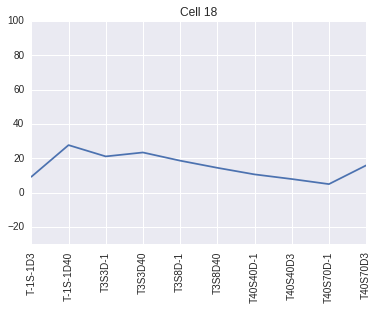

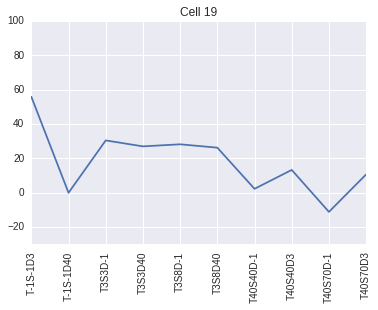

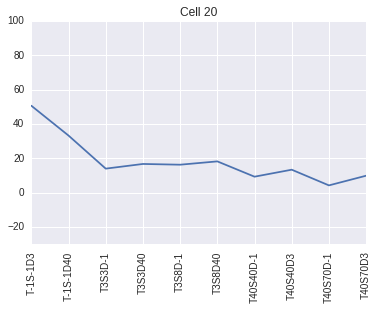

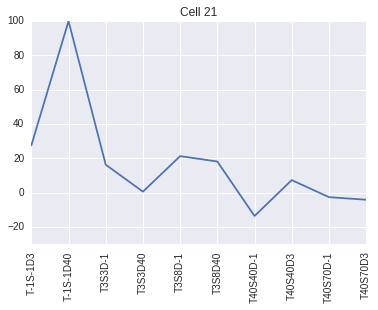

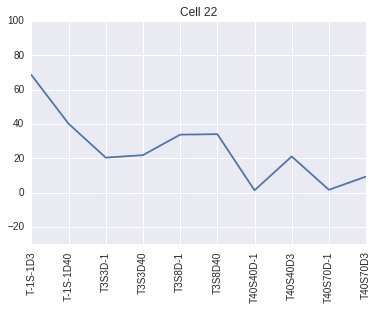

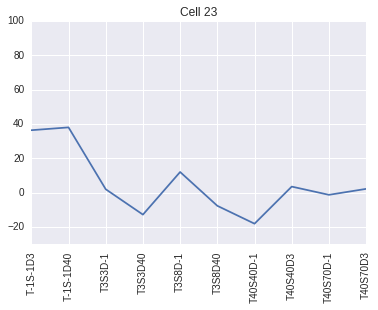

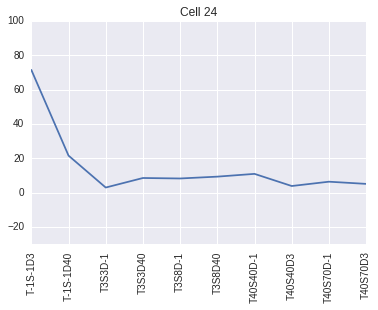

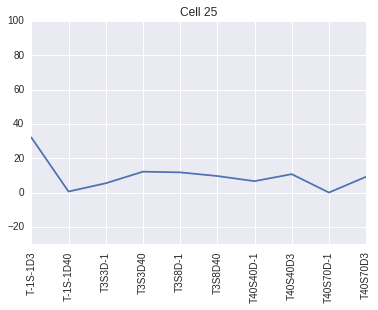

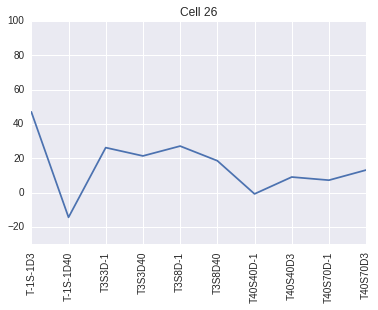

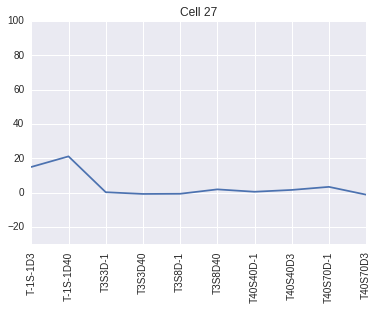

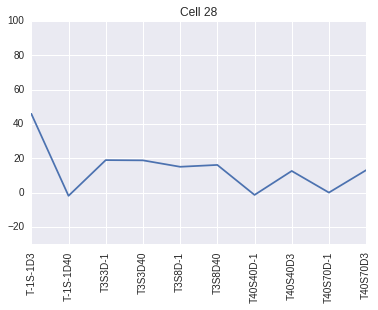

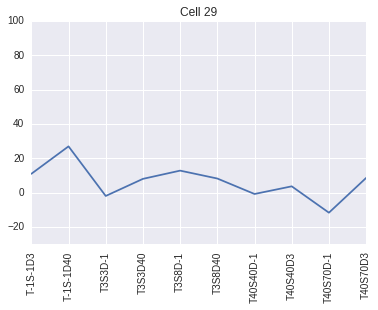

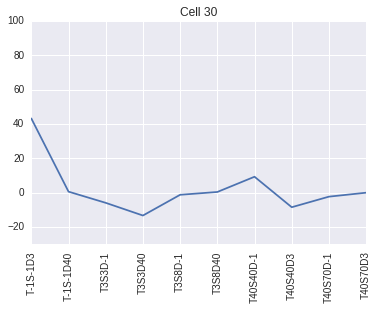

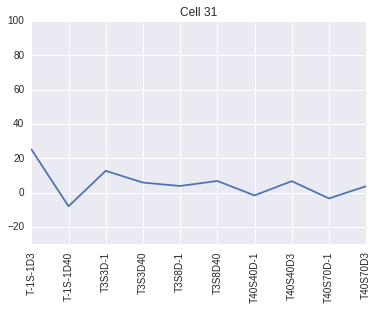

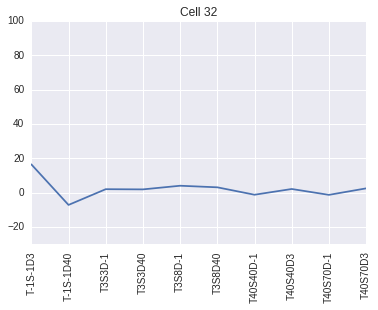

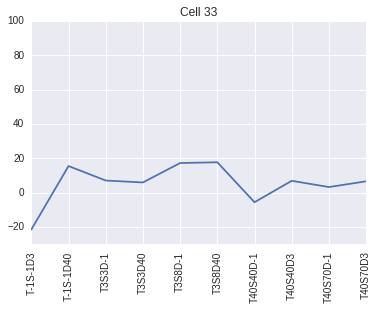

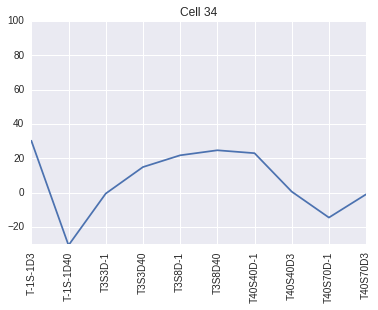

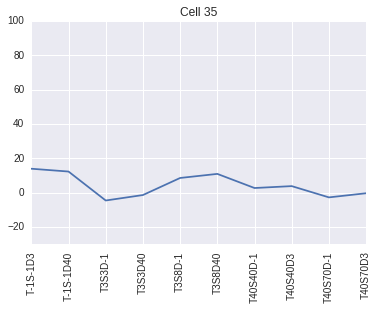

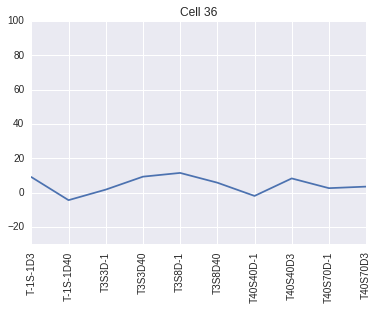

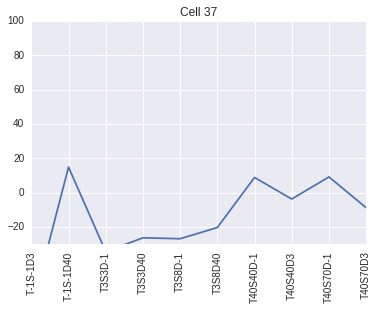

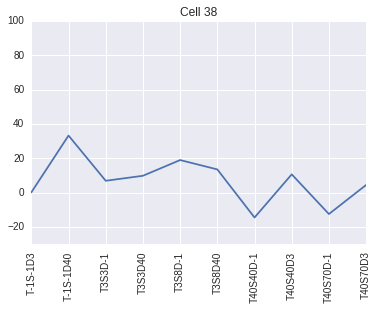

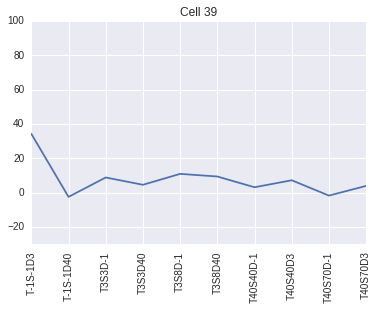

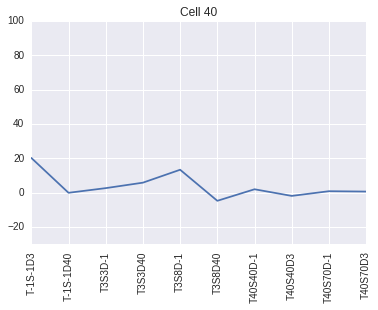

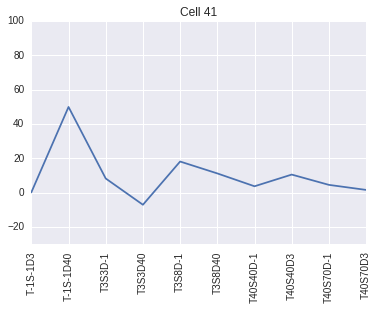

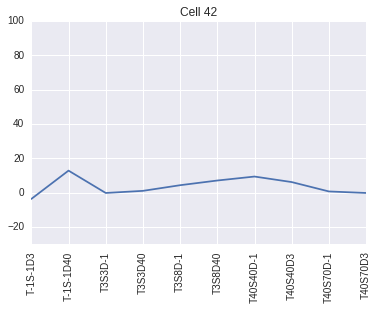

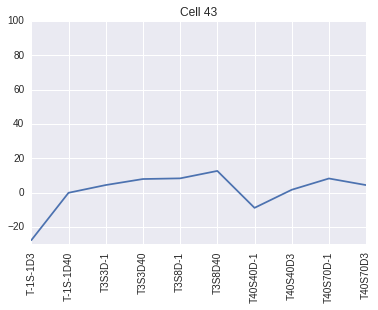

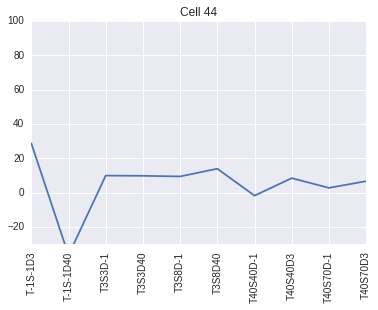

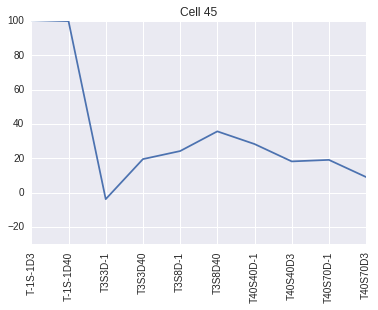

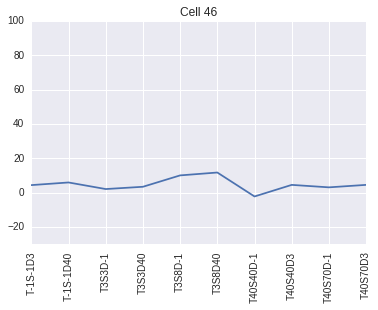

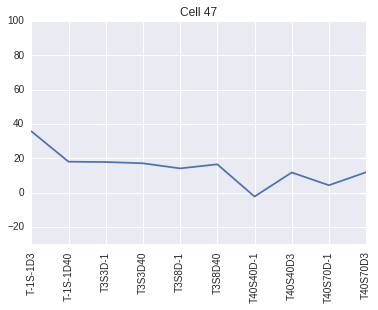

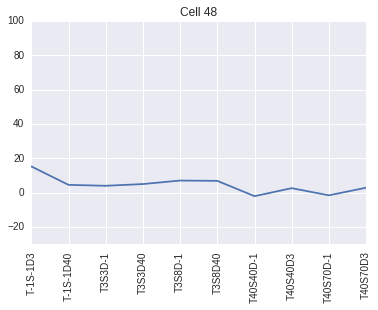

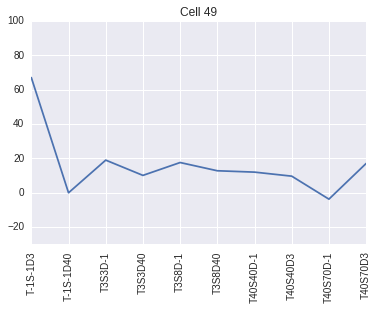

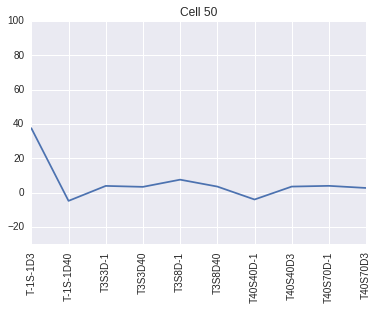

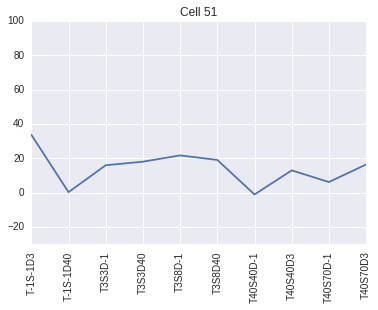

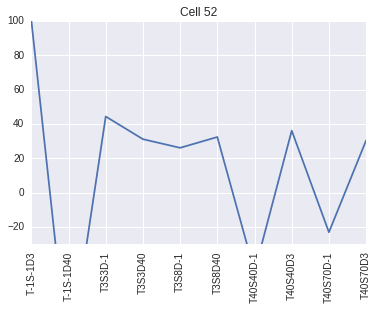

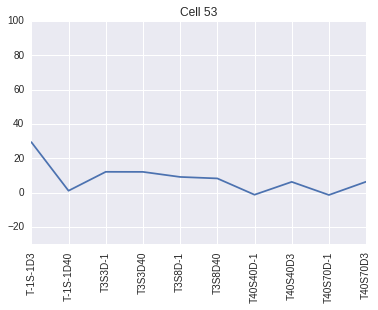

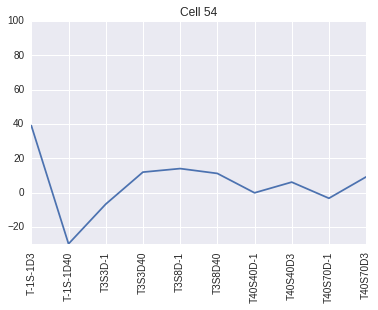

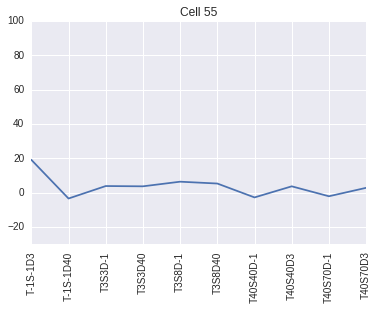

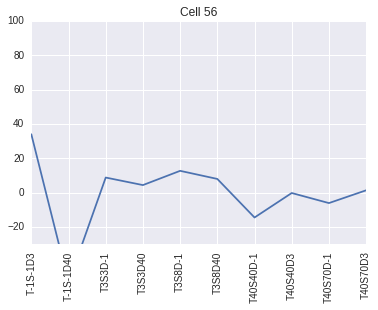

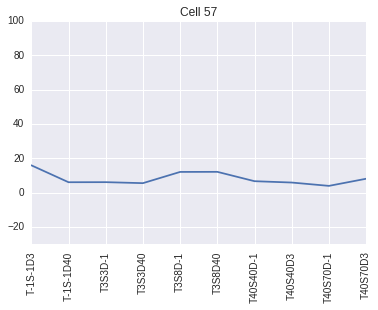

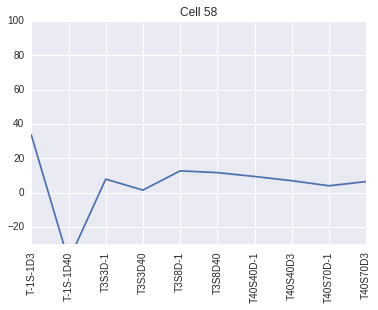

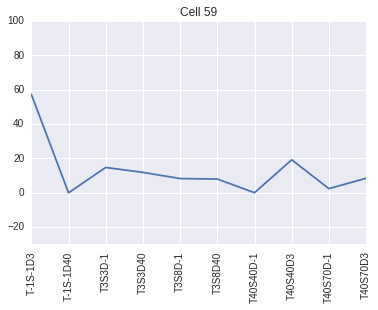

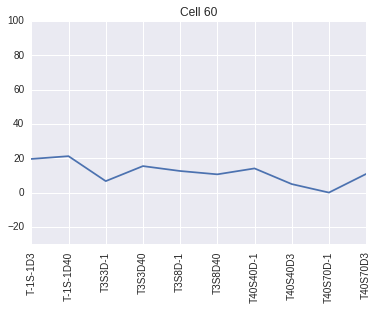

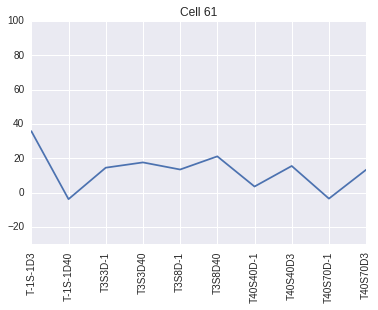

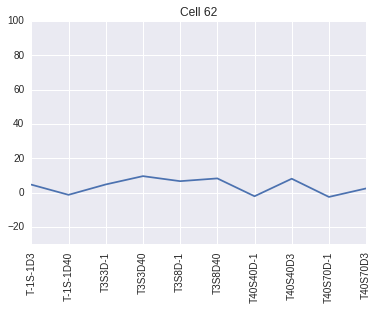

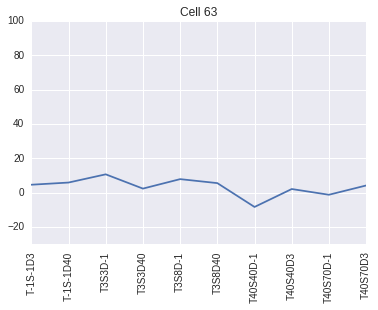

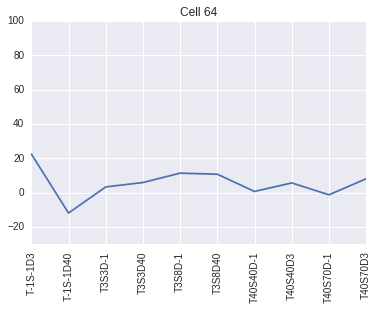

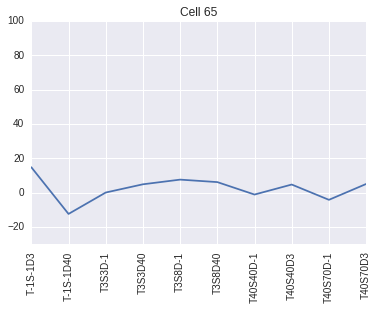

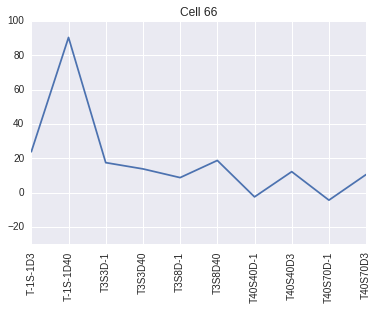

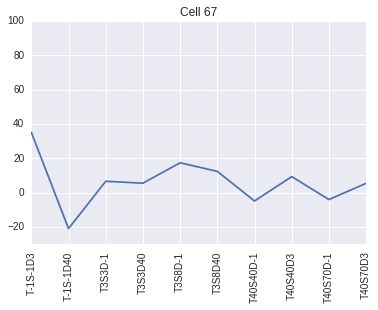

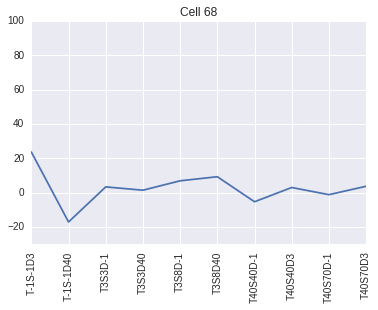

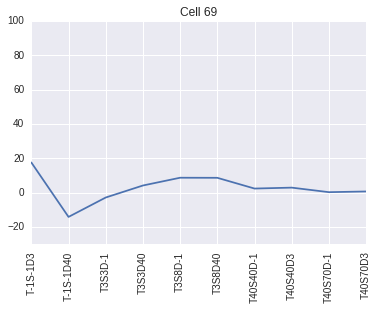

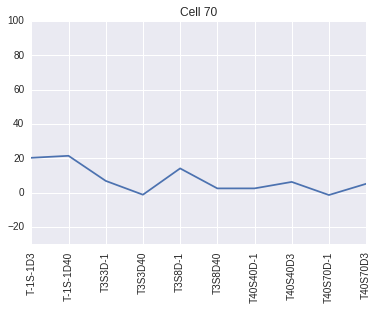

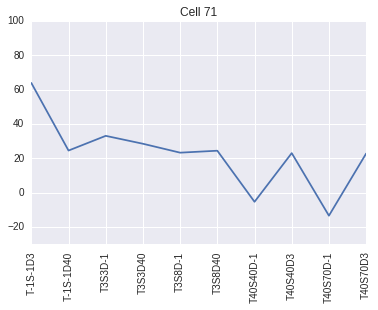

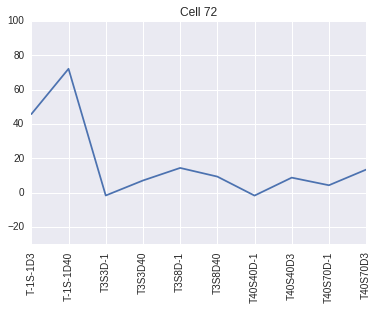

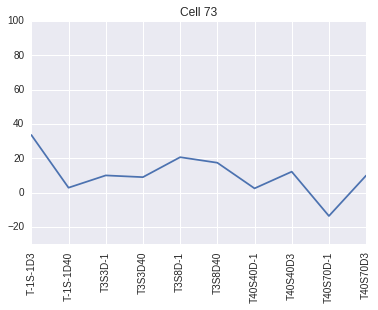

In [79]:
for cell in range(74):
    plt.figure()
    plt.plot(celldata[:, cell])
    plt.xticks(range(10), stims, rotation='vertical')
    plt.title('Cell {}'.format(cell))
    plt.ylim([-30, 100])
    plt.savefig('/home/brad/cell_{}_auditory.png'.format(cell))